In [1]:
from utils_filter import *
from utils_datetime import *
from utils_geography import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
# read in data
data_location = 'data'
moderate = False # only consider moderate days
labelled = True # start with already labelled data
outlooks, pph, reports = read_datasets(data_location, moderate, labelled)

reading outlooks
reading pph
reading storm reports


In [44]:
def consolidate_date(outlooks, pph, reports):
    earliest_date = max(min(outlooks['DATE']), min(pph['time']), min(reports['DATE']))
    latest_date = min(max(outlooks['DATE']), max(pph['time']), max(reports['DATE']))
    reports = reports[reports['DATE'] < latest_date]
    reports = reports[reports['DATE'] > earliest_date]
    outlooks = outlooks[outlooks['DATE'] < latest_date]
    outlooks = outlooks[outlooks['DATE'] > earliest_date]
    all_pph_dates = pph['time']
    pph_dates = all_pph_dates[all_pph_dates < latest_date]
    pph_dates = pph_dates[pph_dates > earliest_date]
    pph = pph.sel(time = pph_dates)
    return(outlooks, pph, reports)

(outlooks, pph, reports) = consolidate_date(outlooks, pph, reports)


In [52]:
def plot_ramps(pph, title_insert=''):
    # 2d histogram of ramps
    # Bar chart of region, season, max category, 4 ramp. Same for just moderate and up
    ramp_up_bins = [-.5, .5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]
    ramp_up_amounts = [0, 1, 2, 3, 4, 5, 6]
    ramp_down_amounts = [-6, -5, -4, -3, -2, -1, 0]
    ramp_down_bins = [-6.5, -5.5, -4.5, -3.5, -2.5, -1.5, -.5, .5]
    heatmap = np.histogram2d(np.array(pph['RAMP_UP'][pph['RAMP_UP']!= 'NONE'], dtype=int), np.array(pph['RAMP_DOWN'][pph['RAMP_UP']!= 'NONE'], dtype=int), bins = (ramp_up_bins, ramp_down_bins))
    im = plt.imshow(heatmap[0],  norm=colors.LogNorm())
    plt.colorbar(im)
    bins = len(ramp_up_bins)
    for i in range(bins-1): 
        for j in range(bins-1): 
            plt.annotate(str(int(heatmap[0][i][j])), xy=(j, i), 
                        ha='center', va='center', color='black') 

    plt.xticks(ramp_up_amounts, labels=ramp_down_amounts)
    plt.yticks(ramp_up_amounts, labels=ramp_up_amounts)
    plt.xlabel("Ramp Down")
    plt.ylabel("Ramp Up")
    plt.title("Number of " + title_insert + "Days with each Ramp Up and Ramp Down Amount")
    plt.show()

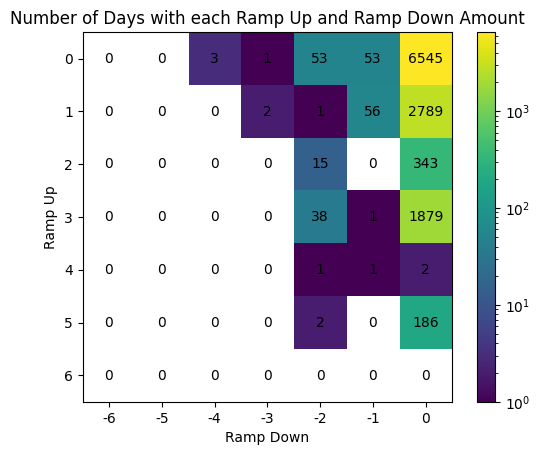

In [53]:
plot_ramps(pph)

In [131]:
def plot_distribution(pph, label_name, label_dict, written_label):

    labels = pph[label_name]
    label_counts = labels.groupby(labels).count()
    def sort_order(key):
        return label_dict[key[0]]
    sorted_labels, sorted_counts = zip(*sorted(zip(list(label_counts[label_name].values), label_counts.values), key = sort_order))
    plt.bar(sorted_labels, sorted_counts)  
    plt.xlabel(written_label)
    plt.title('Number of Days With Each '  + written_label)
    plt.ylabel("Number of Days")
    plt.show()

In [132]:
label_names = ['MAX_CAT', 'RAMP_CATEGORIES', 'SEASON', 'REGION']

category_dict = {
    None : -1,
    'NONE' : -1,
    'TSTM': 0,
    'MRGL': 1,
    'SLGT': 2,
    'ENH': 3,
    'MDT': 4,
    'HIGH': 5
}

ramp_dict = {
    'NONE': -1,
    'up': 0,
    'down': 1,
    'both': 2,
    'neit': 3
}

season_dict = {
    'NONE': -1,
    'Wint': 0,
    'Spri': 1,
    'Summ': 2,
    'Fall': 3
}

region_dict = {
    'NONE': -1,
    'West': 0,
    'Grea': 1,
    'Midw': 2,
    'Nort': 3,
    'Sout': 4
}

dicts = [category_dict, ramp_dict, season_dict, region_dict]
written_labels = ['Categorical Risk', 'Ramp', 'Season', 'Region']


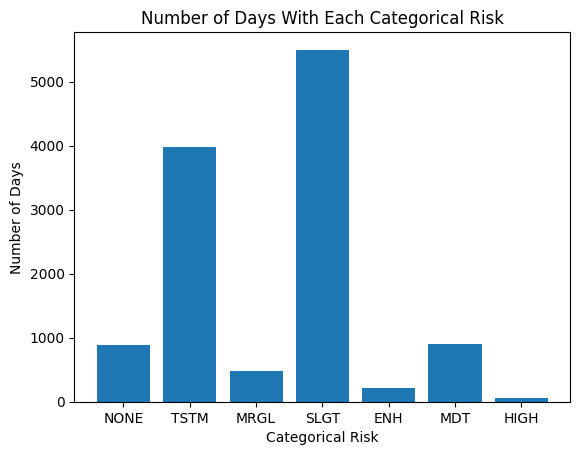

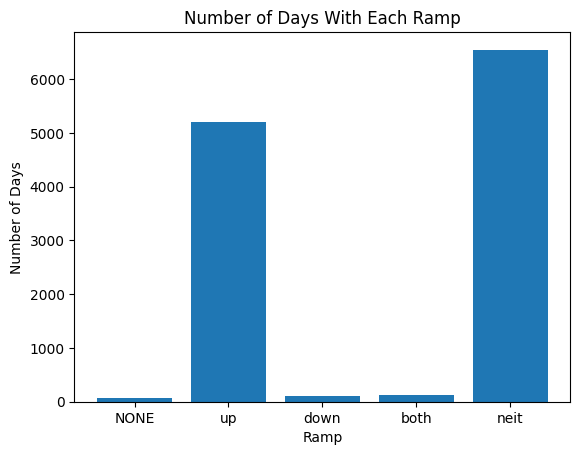

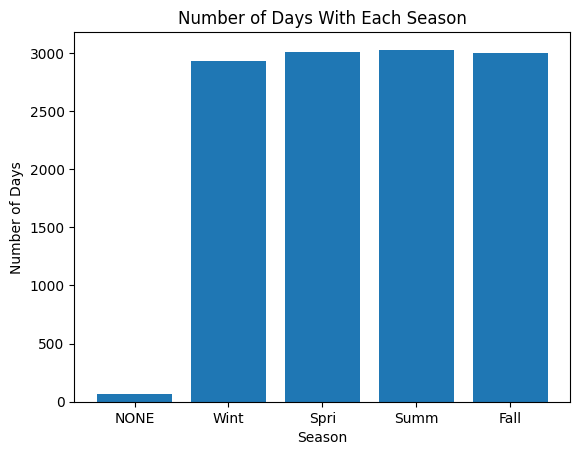

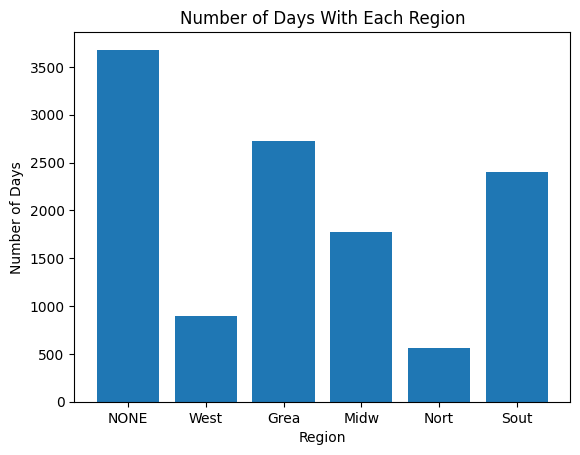

In [133]:
for i in range(len(written_labels)):
    plot_distribution(pph, label_names[i], dicts[i], written_labels[i])

In [118]:
set(pph['REGION'].values)

{'Grea', 'Midw', 'NONE', 'Nort', 'Sout', 'West'}

In [128]:
set(pph['RAMP_CATEGORIES'].values)

{'NONE', 'both', 'down', 'neit', 'up'}